<a href="https://colab.research.google.com/github/rijinbaby/Digit-classification-Kernel-Perceptron/blob/main/kernel_perceptrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the first step we get dataset and add it to google colaboratory

In [ ]:
!wget https://data.deepai.org/mnist.zip

--2021-10-30 14:59:01--  https://data.deepai.org/mnist.zip
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11597176 (11M) [application/x-zip-compressed]
Saving to: ‘mnist.zip’

mnist.zip           100%[===================>]  11.06M  4.67MB/s    in 2.4s    

2021-10-30 14:59:05 (4.67 MB/s) - ‘mnist.zip’ saved [11597176/11597176]



In [ ]:
!pip install python-mnist

In [ ]:
!unzip mnist.zip -d .

Archive:  mnist.zip
  inflating: ./train-labels-idx1-ubyte.gz  
  inflating: ./train-images-idx3-ubyte.gz  
  inflating: ./t10k-images-idx3-ubyte.gz  
  inflating: ./t10k-labels-idx1-ubyte.gz  


In [ ]:
!mkdir mnist

In [ ]:
!gunzip t10k-images-idx3-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
!gunzip train-images-idx3-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz 

In [ ]:
import shutil

shutil.copy('t10k-images-idx3-ubyte','mnist/t10k-images-idx3-ubyte')
shutil.copy('t10k-labels-idx1-ubyte','mnist/t10k-labels-idx1-ubyte')
shutil.copy('train-images-idx3-ubyte','mnist/train-images-idx3-ubyte')
shutil.copy('train-labels-idx1-ubyte','mnist/train-labels-idx1-ubyte')

'mnist/train-labels-idx1-ubyte'

In the second step we define a function to calculate accuracy


In [ ]:
import numpy as np

def calculate_acc(preds, gt):
  return np.count_nonzero(preds==gt[:len(preds)]) / float(len(preds))


  

In this part we load out dataset and split it to x ,y and train , test



In [ ]:
#loading dataset
from mnist import MNIST

mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()



Here we load our defined model that has been added from Model folder in zip file to google colab content

In [ ]:
from Models.multiClassKernelPerceptron import MultiClassKernelPerceptron





import Models.kernelFunctions as kernelFunctions



In this step for getting more meaningful learning we standardize our data by dividing into same number. (for this type of data 255 is used.)

In [ ]:
#standardizing data
X_train = np.array(X_train)[:10000] / 255
y_train = np.array(y_train)[:10000]

X_val = np.array(X_test)[5000:] / 255
y_val = np.array(y_test)[5000:]

X_test = np.array(X_test)[:5000] / 255
y_test = np.array(y_test)[:5000]

In this step we implement kernel perceptron in 1-6 degree and for class 1-10 and repeat it up to 1 -10 epoch and calculate model accuracy for each conditional parameters.

In [ ]:
#implementing kernel perceptron for 1-6 degree and fto class 1-10 with 1 -10 epoch and calculating accuracy for each condition

poly_degree = [1,2,3,4,5,6]

ALL_VACC = []
ALL_TACC = []

for degree in poly_degree:

  tacc = []
  vacc = []
  print(f"Degree: {degree}")
  kernel_perceptron = MultiClassKernelPerceptron(kernelFunctions.polynomial_kernel, degree)
  kernel_perceptron.train(X_train, y_train, X_val, y_val)
  
  VACC = list(kernel_perceptron.vacc.values())
  ALL_VACC.append(VACC)


  TACC = list(kernel_perceptron.tacc.values())
  ALL_TACC.append(TACC)
  
  # y_pred = kernel_perceptron.predict(X_test)
  # acc = calculate_acc(y_pred, y_test)

  # print(f"Test accuracy: {acc}")



Degree: 1
Training Class 0
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9749 0.9782 0.9782
2 0.9845 0.9808 0.9808
3 0.9867 0.9850 0.9850
4 0.9873 0.9878 0.9878
5 0.9894 0.9902 0.9902
6 0.9896 0.9886 0.9902
7 0.9898 0.9890 0.9902
8 0.9898 0.9878 0.9902
9 0.9896 0.9890 0.9902
10 0.9893 0.9892 0.9902
11 0.9901 0.9914 0.9914
Training Class 1
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9769 0.9902 0.9902
2 0.9828 0.9884 0.9902
3 0.9843 0.9836 0.9902
4 0.9857 0.9842 0.9902
5 0.9858 0.9776 0.9902
6 0.9860 0.9904 0.9904
7 0.9873 0.9880 0.9904
8 0.9865 0.9870 0.9904
9 0.9880 0.9860 0.9904
10 0.9885 0.9904 0.9904
11 0.9894 0.9866 0.9904
Training Class 2
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9540 0.9694 0.9694
2 0.9616 0.9796 0.9796
3 0.9642 0.9694 0.9796
4 0.9653 0.9646 0.9796
5 0.9642 0.9726 0.9796
6 0.9677 0.9772 0.9796
7 0.9675 0.9588 0.9796
8 0.9663 0.9760 0.9796
9 0.9662 0.9702 0.9796
10 0.9692 0.9674 0.9796
11 0.9684 0.9794 0.9796
Training Class 3
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9

In this part we plot train and test error for each class classifier using different parameters.

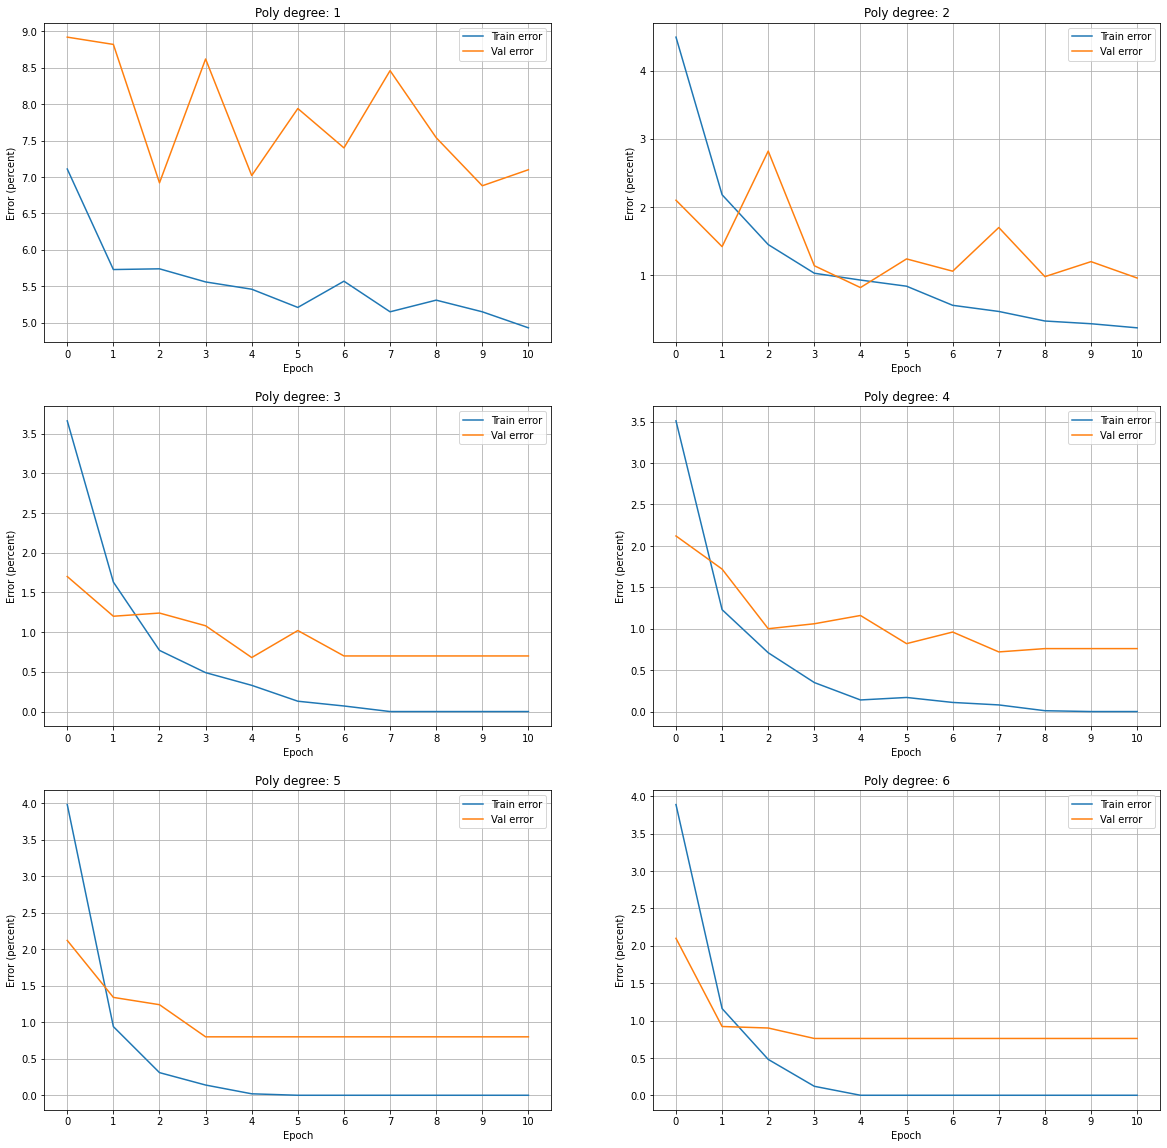

In [ ]:
#ploting train and test error for each class classifier 
import matplotlib.pyplot as plt

digit = 9

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,20))

counter = 0

for row in ax:
  for col in row:
  
    y1 = 100 - np.array(ALL_TACC[counter][digit])*100
    y2 = 100 - np.array(ALL_VACC[counter][digit])*100
    x = list(range(len(y1)))

    col.plot(x, y1, label = 'Train error')
    col.plot(x, y2, label = 'Val error')

    col.set_ylabel("Error (percent)")
    col.set_xlabel("Epoch")

    col.title.set_text(f"Poly degree: {counter + 1}")
    
    col.set_xticks(list(range(11)))

    counter += 1
    col.legend()

    col.grid()

In the last part we have multiple steps:
first we find the best parameters for each class classifier
then we train each class with it's best parameters
Finally we fit our multiclass classifier to the test data and print the test accuracy

In [ ]:
#finding best parameters for each digit classifier in implementing the final multiclass classifier with best parameters: 
C = {}
for i in range(len(ALL_VACC)):
    C[i] = []
    for val_acc in ALL_VACC[i]:
        C[i].append(val_acc[-1])

C = np.array(list(map(lambda a:list(a), C.values())))
pols = [np.argmax(C[:, i]) for i in range(C.shape[1])]#best parameters (polynomial kernel degree) for each digit classifier(1-10)

test_acc = []        

for i, pol in enumerate(pols): #implementing the final multiclass classifier with best parameters in each class classifier

  kernel_perceptron = MultiClassKernelPerceptron(kernelFunctions.polynomial_kernel, pol)#Multiclass Classifier(ensembling all classifiers)
  
  xtrain = X_train
  ytrain = y_train
  xval = X_val
  yval = y_val
  
  kernel_perceptron.train(xtrain, ytrain, xval, yval)

  xtest = X_test[y_test == i]
  ytest = y_test[y_test == i]
  
  y_pred = kernel_perceptron.predict(xtest)
  acc = calculate_acc(y_pred, ytest)

  test_acc.append(acc)
  
print(f"Test accuracy: {np.mean(acc)}") #final classifier accuracy using best parameters

'''
<<OutPut>> 

#best parametrs (polymomial kernel degree) for each digit classifire(1-10):
pols
Out[71]: [2, 4, 3, 4, 1, 4, 2, 4, 4, 2]


Test accuracy: 0.9153846153846154
'''         

Training Class 0
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9837 0.9836 0.9836
2 0.9936 0.9958 0.9958
3 0.9953 0.9950 0.9958
4 0.9969 0.9948 0.9958
5 0.9980 0.9960 0.9960
6 0.9993 0.9950 0.9960
7 0.9989 0.9954 0.9960
8 0.9998 0.9956 0.9960
9 0.9995 0.9944 0.9960
10 0.9993 0.9948 0.9960
11 1.0000 0.9948 0.9960
Training Class 1
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9850 0.9936 0.9936
2 0.9937 0.9918 0.9936
3 0.9959 0.9918 0.9936
4 0.9959 0.9970 0.9970
5 0.9968 0.9966 0.9970
6 0.9975 0.9970 0.9970
7 0.9980 0.9954 0.9970
8 0.9988 0.9966 0.9970
9 0.9983 0.9966 0.9970
10 0.9993 0.9982 0.9982
11 0.9986 0.9958 0.9982
Training Class 2
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9720 0.9876 0.9876
2 0.9880 0.9854 0.9876
3 0.9928 0.9878 0.9878
4 0.9945 0.9916 0.9916
5 0.9958 0.9916 0.9916
6 0.9972 0.9896 0.9916
7 0.9964 0.9910 0.9916
8 0.9980 0.9920 0.9920
9 0.9987 0.9918 0.9920
10 0.9987 0.9918 0.9920
11 0.9988 0.9926 0.9926
Training Class 3
Epoch|Train Acc|Val Acc|Best Val Acc|
1 0.9642 0.9768

'\n<<OutPut>> \n\n#best parametrs (polymomial kernel degree) for each digit classifire(1-10):\npols\nOut[71]: [2, 4, 3, 4, 1, 4, 2, 4, 4, 2]\n\n\nTest accuracy: 0.9153846153846154\n'